In [1]:
from  konlpy.tag import Kkma, Komoran, Okt
from nltk import sent_tokenize, word_tokenize
import os
from collections  import defaultdict, Counter
from math import log2, log10


#### 1.파일명과 수집내용을 Dictionary 전환

In [2]:
#파일 경로
path = '/home/hadoop/jupyternotebook/Study/GalleriaPJ/blog'

col_blg = dict()

doc_lmt = 1000 
doc_cnt = 0

for _ in os.listdir(path):
    doc_cnt +=1
    if _.startswith('.') : continue
        
    with open(path+'/'+_,"r") as fp:
#         print(_)
        tmp_str = fp.read()
        if '증권' not in tmp_str : col_blg[_] = tmp_str
        fp.close()
    if doc_cnt >= doc_lmt: break
          
    

### 1-1.파일에서 '갤러리아' 단아가 포함된 라인만 read

In [3]:
#파일 경로
path = '/home/hadoop/jupyternotebook/Study/GalleriaPJ/blog'

col_blg = dict()

doc_lmt = 1000
doc_cnt = 0

for fn in os.listdir(path):
    doc_cnt +=1
    if fn.startswith('.') : continue
    gal_line = ""    
    with open(path+'/'+fn,"r") as fp:
#         print(_)
       str_lines = fp.readlines()
       for _ in str_lines:
            gal_line += _ if '갤러리아' in _ else "" 
    fp.close()
    col_blg[fn] = gal_line 
    if doc_cnt >= doc_lmt: break
          

#### 2.전처리 작업

In [4]:
# 패턴 정의
from string import punctuation
import re
pattern = dict()

# 구두점
pattern1 = re.compile(r'[{0}]'.format(re.escape(punctuation)))
pattern['punc'] = pattern1
# corpus = pattern1.sub(' ',corpus)

# 불용어 : 알파베 포함
# pattern2 = re.compile(r'[A-Za-z0-9]{7,}')
# pattern['stop'] = pattern2
# corpus = pattern2.sub(' ',corpus)

# 이메일
# pattern3 = re.compile(r'\w{2,}@\w{3,}(.\w{2,})+')
pattern3 = re.compile(r'\w{2,}@(.?\w{2,})+')
pattern['email'] = pattern3
# corpus = pattern3.sub(' ',corpus)

# 도메인
pattern4 = re.compile(r'(.?\w{2,}){2,}')
pattern['url'] = pattern4
# corpus = pattern4.sub(' ',corpus)

# 한글 이외
pattern5 = re.compile(r'[^가-힣0-9]+')
pattern['nonkorean'] = pattern5
# corpus = pattern5.sub(' ',corpus)

# WhiteSpace
pattern6 = re.compile(r"\s{2,}")
pattern['whitespace'] = pattern5
# corpus = pattern6.sub(' ',corpus)


#Business Stop Word
bisstop_word = ['갤러리아', '백화점', '블로그', '이전','로그인','댓글','블로거']


### 불용어 제거 Function

In [5]:
def stopword_replace(stopw, str):
    for _ in stopw:
        str = re.compile(_).sub(" ",str)
    return str

In [6]:
# N-gram
def ngram(term, n=2):
    return [term[i:i+n] for i in range(len(term) -n +1)]


### 3.형태소 분석

In [7]:
ma = Komoran()

def prepro_collection(col):
    clct = col.copy()
    
    for idx, content in clct.items():
        
        indexTerm_content = defaultdict(int)
        # 패턴 전치리
        ## 불용어 제거
        content = stopword_replace(bisstop_word,content)
        
        for _ in ['email','punc', 'whitespace']:
            content_pth = pattern[_].sub(" ", content)
        for tokens in word_tokenize(content_pth) :        
            for term_pos in ma.pos(tokens) :
#                 if len(term_pos[0]) > 1 and term_pos[1].startswith("N") :
                  if len(term_pos[0]) > 1 and term_pos[1].startswith("N") :
                      indexTerm_content[term_pos[0]] +=1
                      #ngram 사용시 아래 적용
#                     for n in ngram(term_pos[0]):
#                         indexTerm_content[n] +=1
         
        clct[idx] = indexTerm_content  
        
   
    return clct

In [8]:
from konlpy.tag import Hannanum ,Kkma, Komoran, Twitter,Okt
Komoran().tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [8]:
pre_dict = prepro_collection(col_blg)
# dic_lexicon = defaultdict(int)
# pre_dict.values()
cnt_lexicon = Counter()
for _ in pre_dict.values() :
    cnt_lexicon += Counter(_)
# dic_lexicon.update(pre_dict.values())
# for _ in pre_dict.items():
#     print(_)
#     for d in _[1].items():
#         print(d)
#         dic_lexicon[d] += d.
#     for _ in _[1]:
#         print(_)
#         dic_lexicon[_[0]] += _[1]
#     print(type(_[1])
# dic_lexicon

In [9]:
cnt_lexicon.most_common(10)

[('진주', 26050),
 ('헤어', 11894),
 ('머리', 9561),
 ('운전', 9303),
 ('추천', 9218),
 ('대리', 9170),
 ('미용실', 7369),
 ('스타일', 5875),
 ('여자', 4120),
 ('원룸', 3950)]

### pooh2607_221638562785 글에서 '작품' 단어만 29번 추출 다빈도 단어로는 분석은 의미가 없음

In [10]:

# 입력 된 단어가 들어가 문서 찾기
def find_fileName_word(dic_dic,f_wd):

    file_list = []

    for _ in pre_dict.items():
        fileName = _[0]
        if f_wd in _[1].keys(): file_list.append(fileName)
    return file_list


# 입력 된 단어가 들어간 문서 print
def print_doc_word(dic_dic, f_wd, m_cnt=3):
    file_list = []
    rd_cnt = 0

    for _ in pre_dict.items():
        fileName = _[0]
        if f_wd in _[1].keys(): 
#             file_list.append(fileName)
            with open(path + '/' +fileName, 'r') as f:
                a=f.read()
                print('----------------------------------------')
                print('---------'+ fileName +'----------')
                print(a)
                f.close()
            rd_cnt +=1
        if rd_cnt == m_cnt : return           
    

In [11]:
print_doc_word(pre_dict,'운전')

----------------------------------------
---------jsh850224_221682258638----------






로그인
Place j
블로그 메뉴






글쓰기
가벼운 글쓰기툴 퀵에디터가 오픈했어요!
life info 2
목록열기
신사역피부관리/광대뼈,얼굴윤곽 경락마사지 전후 효과


두근두근


두근두근
4시간 전
본문 기타 기능

 
 
 
 
 
 
전 요즘 너무 편안한 나날을 보내고 있는데 그 비결에
대해서 친구들도 물어보고 주변에서도 하도 귀찮게 하길래!
제가 그냥 이렇게 글을 제대로 적어서 이 링크를 보내주려고
마음을 먹고 있어요. ㅋㅋㅋ 매번 똑같은 말 하고 전화번호
알려주고 전후 사진 보여주고 하는 거 너무 힘들더라고요.
하지만 그런 관심이 있다는 건~ 그만큼 제가 많이
변했다는 거니 저 기뻐해도 되는 거 맞죠? 호호♡
 
 
 
어쨌든 저는 이번에 신사역피부관리
쪽에서 윤곽관리 마사지를 받게 되었답니다.
 
 
 
 
 
가장 최근 사진인데 턱 부분이 정말 많이 갸름해졌죠?
위에 사진하고 비교해보면 그 차이를 확연하게
느낄 수 있을 거예요. 예전보다 이목구비 역시 매우
뚜렷해졌답니다. 사실 위에 사진은 관리 초반 시절이고
이 사진은 최근이거든요. 접때도 저는 1회 만에 많이
바뀌었다며 저세상 호들갑을 떨어댔었죠. 친구들이
그만 좀 하라며. ㅋㅋㅋ 근데 여러분도 직접 경험해보시면
아마 저와 같은 반응을 보이실 수밖에 없을 거예요.
저는 넓은 광대가 고민이었어요. 이것 때문에 약간 얼굴이
볼록렌즈 같아 보이고 넙데데해 보이더라고요.
 
 
 
 
 
 
 
저와 비슷한 얼굴형을 가진 연예인들이 몇 달 쉬는 사이
너무나 완벽한 얼굴형으로 나타나는 것이 신기하기도 하고
그 비결이 궁금해서 알아본 결과 
연예인 광대뼈경락샵으로 유명한 정본 에스테틱이라는
곳이 있더라고요. 여기가 경락으로는 거의 일인자 수준인데,
그 명성답게 연예인 고객 또한 많이 가지고 있어서 자연스럽게
입소문이 나는 곳인가 봐요. 제가

In [12]:
find_fileName_word(pre_dict,'진주')

['hyunsuk3210_221681746871',
 'newkdj401_221681711266',
 'cokbang01_221681567247',
 'qkrtpdlf44_221681548011',
 'kccdaejeon_221681509110',
 '2239600_221681498501',
 'jyg9987_221681378794',
 'gnu7739_221681343964',
 'nam6634_221680629664',
 'adorableart_221680621858',
 'monicca726_221680617022',
 'kimgakn2_221680599895',
 'rladyddn2834_221680540517',
 'ekrwlk34_221680450663',
 'swjh9323_221680447560',
 'qkrtpdlf44_221680383449',
 'woochul2172_221680365166',
 'ppmint1123_221680266180',
 'cafealtro_221680174917',
 'myjet37_221679813196',
 'jhjh_0701_221679296781',
 'erzsebett_221679260210',
 's00hyun325_221679167846',
 'nam6634_221678967216',
 'mimilog_221678946094',
 'paul977_221678904649',
 'gooseulee_221678895390',
 'nam6634_221678625077',
 'tjql792277_221678606383',
 'nam6634_221678606895',
 'nam6634_221678602382',
 'mpmass_221678431636',
 'cafealtro_221678337643',
 'nam6634_221678322748',
 'nam6634_221678307060',
 'nam6634_221678296303',
 'nam6634_221678286990',
 'nam6634_22167828143

In [ ]:
f_name = 'cafealtro_221675385478'
with open(path +'/'+f_name,'r') as f:
    a= f.read()
    print(a)
    

### Word Cloud

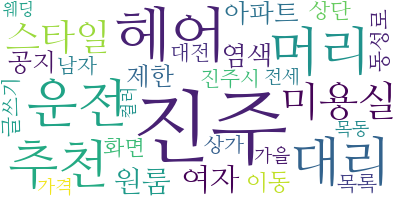

In [55]:
from wordcloud import WordCloud
font ="/usr/share/fonts/NanumFont/NanumMyeongjo.ttf"
wc = WordCloud(font_path=font, max_words=30, background_color='white')
wc.generate_from_frequencies(cnt_lexicon)
wc.to_image()

## TF-IDF 기준 재선정

In [ ]:
from math import sqrt

DTM = defaultdict(lambda:defaultdict(int))
TDM = defaultdict(lambda:defaultdict(int))
TWM = defaultdict(lambda:defaultdict(int))
DVL = defaultdict(float)

#DTM
for idx, termList in pre_dict.items():
    for term, freq in termList.items():
        DTM[idx][term] = freq

#TDM
for idx, termList in DTM.items():
    for term, freq in termList.items():
        TDM[term][idx] = freq

# 문서 개수
N = len(DTM)

#TWM
for idx, termList in DTM.items():
    maxTF = max(termList.values())
    
    for term, freq in termList.items():
        
        TF = freq/maxTF
        IDF =  log10(N/len(TDM[term]))
        
        TWM[term][idx] = TF*IDF
        DVL[idx] += TWM[term][idx]**2
        

In [ ]:
TWM['번개']

In [37]:
import math
TWC = defaultdict(float) 


for term, WM in TWM.items():
    tmp_sum = math.fsum(WM.values()) 
    TWC[term] = tmp_sum
#     print(term + " : "+ str(tmp_sum))

In [ ]:
TWC

In [39]:
res = sorted(TWC.items(),key=(lambda x: x[1]),reverse=True)

In [48]:
res

[('대전', 49.713345081396106),
 ('매물', 45.45103044124612),
 ('공인중개사', 41.23219284151669),
 ('광교', 39.424615975002204),
 ('아파트', 36.376187036006286),
 ('상가', 34.898492438597025),
 ('청담', 33.02187792309282),
 ('번개', 32.32576734670621),
 ('상품', 32.26256367806868),
 ('장터', 31.528702863818395),
 ('제품', 31.34718726790115),
 ('맛집', 30.96055247464128),
 ('진주', 30.727689812190416),
 ('둔산동', 30.497551257801472),
 ('주문', 30.45503914553491),
 ('매장', 29.79678794617112),
 ('사무소', 29.512356009267922),
 ('불가', 29.496298967897417),
 ('구매', 28.490431099937513),
 ('부동산', 28.292252603511326),
 ('공간', 28.177547231329697),
 ('게시판', 28.144498841206353),
 ('만원', 27.880126191493833),
 ('천안', 27.363765513893718),
 ('세대', 27.106622296432242),
 ('정보', 26.14181669488171),
 ('고급', 25.903039866069985),
 ('매매', 25.84224819853487),
 ('주택', 25.69055123071351),
 ('가격', 25.37173328899982),
 ('사진', 25.246927558421845),
 ('반지', 25.15074768351101),
 ('브랜드', 24.913580276790963),
 ('청담동', 24.437814889504516),
 ('수원', 24.3628123

### 증권, 주식 관련 문서 제외 필요

##### 문서별 TF-IDF 지수가 큰 WORD별 n개 추출

In [ ]:
DWM = defaultdict(lambda:defaultdict(int))

for wd,dw in TWM.items():
    for filname, w in dw.items():
        DWM[filname][wd] = w
        

In [50]:
from heapq import nlargest
n = 5
n_large_Cnt = Counter()

NWM = defaultdict(int)

for index, WM in DWM.items():
    n_lar = nlargest(n,WM, key=WM.get)
    n_large_Cnt +=Counter(N_lar)
    

In [52]:
n_large_Cnt.most_common(100)

[('매물', 41),
 ('공인중개사', 36),
 ('광교', 34),
 ('번개', 32),
 ('사무소', 29),
 ('대전', 28),
 ('상가', 27),
 ('청담', 27),
 ('장터', 25),
 ('진주', 23),
 ('반지', 20),
 ('둔산동', 20),
 ('아파트', 20),
 ('원룸', 19),
 ('맛집', 19),
 ('주문', 18),
 ('게시판', 17),
 ('빌라', 16),
 ('아크', 16),
 ('채용', 15),
 ('청담동', 15),
 ('주택', 15),
 ('프라이스', 15),
 ('꽃집', 14),
 ('플라워', 13),
 ('가방', 13),
 ('샤넬', 13),
 ('비교', 13),
 ('예물', 13),
 ('수원', 13),
 ('웰시', 12),
 ('지오', 12),
 ('에누리', 12),
 ('상품', 12),
 ('피부', 11),
 ('세대', 11),
 ('미용실', 11),
 ('지구', 11),
 ('분양', 11),
 ('쓰리', 11),
 ('오피스텔', 11),
 ('스튜디오', 11),
 ('창업', 11),
 ('하이퍼', 11),
 ('쇼핑몰', 11),
 ('패딩', 10),
 ('머리', 10),
 ('학원', 10),
 ('천안', 10),
 ('커피', 10),
 ('바니', 10),
 ('모피', 10),
 ('주얼리', 9),
 ('시계', 9),
 ('주방', 9),
 ('매매', 9),
 ('상권', 9),
 ('결혼', 9),
 ('세일', 9),
 ('안경', 8),
 ('엘라', 8),
 ('헤어', 8),
 ('아산', 8),
 ('귀걸이', 8),
 ('고급', 8),
 ('제이', 8),
 ('향수', 8),
 ('타입', 8),
 ('마을', 8),
 ('불당동', 8),
 ('인계동', 8),
 ('진주시', 8),
 ('주식', 8),
 ('압구정로데오역', 7),
 ('마르지', 7),
 ('삼성', 7),
 ('염색'

In [59]:
find_fileName_word(pre_dict,'채용')

['naduya789_221682171655',
 'hampton__221682028370',
 'wrmanager1_221681949997',
 'smsp1_221681441539',
 'modelltwo_221681340506',
 'wrmanager1_221680928194',
 'hjys1973_221680719916',
 'hjys1973_221680716871',
 'hjys1973_221680705492',
 'withpass365_221680576990',
 'lms199811_221680297815',
 'albajob82_221680247805',
 'wrmanager1_221679912406',
 'mint1977_221679838913',
 'hikarubs_221679723874',
 'wrmanager1_221678836238',
 'spen123_221678793711',
 'modelltwo_221678416396',
 'smsp1_221678308148',
 'bum6_221678253486',
 'guide2018_221678253443',
 'symk9071_221678183320',
 'lms199811_221678184494',
 'lch-606_221678180585',
 'albajob82_221678163663',
 'hampton__221677852411',
 'wrmanager1_221677761713',
 'rjrls94_221677654017',
 'smsp1_221677335763',
 'albajob82_221677091594',
 'hampton__221676857815',
 'wrmanager1_221676700156',
 'pfgd6h_221676079248',
 'albajob82_221675434887']

In [14]:
print_doc_word(pre_dict,'플라워')

----------------------------------------
---------siihyun2019_221681709733----------






로그인
flower 是炫
블로그 메뉴






글쓰기
가벼운 글쓰기툴 퀵에디터가 오픈했어요!
plants
목록열기
플라워시현_식물, 은쑥, 압구정꽃집, 신사동꽃집, 선릉로꽃집, 압구정로데오역, 압구정로데오역꽃집


플라워시현


플라워시현
1시간 전
본문 기타 기능

노지에서도 월동이 가능한 은쑥!
보들보들 촉감이 좋아서 계속 만지게 되는..
건조와 추위에는 강하지만
고온과 다습에는 약해요..ㅠㅠ
.
.
.
Touching hearts, loving flowers.
강남구 선릉로 845 1f
02.511.3972
flower 
是炫
​
#압구정로데오역
#압구정로데오역
 
#압구정로데오역꽃집
#압구정로데오역꽃집
#신사동꽃집
#신사동꽃집
 
#압구정꽃집
#압구정꽃집
 
#선릉로꽃집
#선릉로꽃집
#갤러리아백화점맞은편
#갤러리아백화점맞은편
 
#압구정로데오역6번출구
#압구정로데오역6번출구
#플라워시현 #flower
#플라워시현
#flower
是炫
 #식물 #plants
#식물
#plants




취소
확인



공감 

이 글에 공감한 블로거 열고 닫기
이 글에 댓글 단 블로거 열고 닫기
이 글에 댓글 단 블로거 열고 닫기
1
이전

다음

plants글 목록
글 제목
작성일
화면 최상단으로 이동
이 블로그 인기글
글 제목
작성일
화면 최상단으로 이동
화면 최상단으로 이동
RSS 2.0
RSS 1.0
ATOM 0.3
tags
|






글보내기 제한 공지
주제 분류 제한 공지
게시글
5회로 제한




플라워시현
flower 是炫

flower 是炫


----------------------------------------
---------hanwhadays_221679607787----------






로그인
블로그 메뉴
한화






글쓰기
가벼운 글쓰기툴 퀵에디터가 오픈했어요!
친환경/

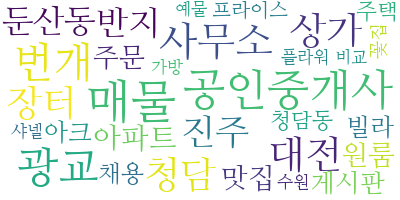

In [56]:
wc.generate_from_frequencies(n_large_Cnt)
wc.to_image()